# Machine learning approach

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant term called the *bias term* (also called the *intercept term*).

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n,  $$

- $\hat{y}$ is the predicted value.

- $n$ is the number of features.

- $x_i$ is the the i-th feature value. 

- $\theta_j$ is the j-th model parameter (including the bias term $\theta_0$ and feature weights $\theta_0, \dots, \theta_n$).

We can write the above equation in vectorized form

$$\hat{y} = h_{\theta}(x) = \theta^T x,$$

- $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.

- $x$ is the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to $1$.

- $\theta$ and $x$ are column vectors.

This is linear regression model. So how do we train it? Training a model means setting its paramters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression mode, you need to find the value of $\theta$ that minimize the RMSE. In practice is simpler to minimize the Mean Square Error (MSE) (= RMSE^2) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of Linear Regression hypothesis $h_\theta$ on a training set $X$ is calculated using

$$\text{MSE}(X, h_\theta) = \frac{1}{m} \sum_{i =1}^{m} (\theta^T x^{(i)} - y^{(i)})^2.$$

To simplify notations we will write just $\text{MSE}(\theta)$ instead of $\text{MSE}(X, h_\theta) $.

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a *closed-form* solution. This is called the *Normal Equation*

$$\hat{\theta} = (X^T X)^{-1} X^T y$$

- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.

- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

In [46]:
import numpy as np

X = 2 * np.random.rand(100,1) 

y = 4 + 3*X + np.random.randn(100,1)

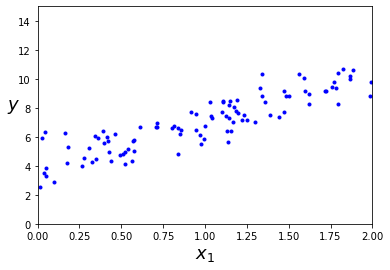

In [47]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let's compute $\hat{\theta}$ using the Normal Equation. We will use the inv() function from NumPy's Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication

In [48]:
X_b = np.c_[np.ones((100,1)), X] #add x0 = 1 to each instance

theta_best  = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 +3x_1 +\text{ Gaussian noise}$. Let's see what the equation found:

In [49]:
theta_best

array([[3.92675368],
       [3.15085769]])

We would have hoped for $\theta_0 = 4$ and $\theta_1 = 3$ instead of the above. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now you can make prediction using $\hat{\theta}$:

In [50]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92675368],
       [10.22846906]])

Let's plot this model's predictions

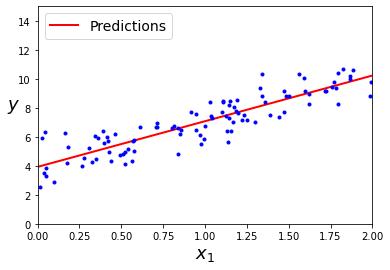

In [51]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Let's perfom linear regression using Scikit-Learn:

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92675368]), array([[3.15085769]]))

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares") which you could call directly:

In [53]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.92675368],
       [3.15085769]])

The function computes $\hat{\theta} = X^{+}y$, where $X^{+}$ is the *pseudoinverse* of $X$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [54]:
np.linalg.pinv(X_b).dot(y)

array([[3.92675368],
       [3.15085769]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decompostion (SVD)* that can decompose the training  set matrix $X$ into the matrix multiplication of three matrices $U  \ \Sigma \ V^T$ (see numpy.linalg.svd()). The pseudoinverse is computed as $X^{+} = V \Sigma^{+} U^T$. To compute the matrix $\Sigma^{+}$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^T X$ is not invertible, such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined.

## Computation complexity 

The Normal Equation computes the inverse of $X^T X$ which is an $(n+1) \times (n+1)$ matrix (where $n$ is the number of features). The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ or $O(n^3)$ (depending on the implementation). The SVD approach used by SciKit-Learn's LinearRegression class is about $O(n^2)$. Also, once you have trained your Linear Regression model (using the Normal Equation or any other alogorithm), predictions are very fast: the computation complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.

Now we will look at very different ways to train a Linear Regression model, better
suited for cases where there are a large number of features, or too many training
instances to fit in memory.

## Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general ideal of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. 

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient descent does: it measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached the minimum!

Concretely, you start by filling $\theta$ with random values (this is *random initialization*), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., MSE), until the algorithm *converges* ot a minimum

![](gradient_descent.png)

An important parameter in Gradient descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time:

![](learning_rate_small.png)

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up then you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution:

![](learning_rate_large.png)

Finally, not all cost function look like nice regular bowls. There may be holes, ridges, plateus, and all sorts of irregular terrains, making convergence to the minimum very difficult. The figure below shows the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as the global minimum. If  it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

![](gradient_descent_pitfalls.png)

Fortunately, the MSE cost function for a Linear Regression model happens to be a *convex function*. There are no local minima, just one global minimum. It is also a continous function with a slope that never changes abruptly. These two facts have a great consequence: Gradien Descent is guaranteed to approach arbitrarily close to the global minimum (if you wait long enough and if the learning rate is not too high)

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. The below figure shows Gradient Descent on a training set where features $1$ and $2$ have the same scale (on the left), and on a training set where feature $1$ has much smaller values than feature $2$ (on the right).

![](gradient_descent_with_without_feature_scaling.png)

As you can see, on the left the Gradient Descent algorithm goes straight toward the
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction
almost orthogonal to the direction of the global minimum, and it ends with a long
march down an almost flat valley. It will eventually reach the minimum, but it will
take a long time.

**Tip**: When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

This diagram also illustrates the fact that training a model means searching for a
combination of model parameters that minimizes a cost function (over the training
set). It is a search in the model’s parameter space: the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a needle
in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately,
since the cost function is convex in the case of Linear Regression, the needle is
simply at the bottom of the bowl

## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. For this you need to compute the *partial derivatives*

$$\frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})x_j^{(i)}$$

Instead of computing these partial derivatives individually, you can compute them all in one go. The gradient vector, noted $c$ contains all the partial derivatives of the cost function (one for each model parameter).


$$\nabla_{\theta} \text{MSE}(\theta) = [\frac{\partial}{\partial \theta_0} \text{MSE}(\theta), \dots, \frac{\partial}{\partial \theta_n} \text{MSE}(\theta)]^T = \frac{2}{m} X^T (X \theta - y).$$

Notice that this formula involves calculations over the full training set $X$, at each Gradient Descent step! This is why the algorithm is called *Batch Gradient Descent*: it uses the whole batch of training data every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.


Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means substracting $\nabla_{\theta} \text{MSE}(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ bto determine the size of the downhill step

$$\theta^{\text{(next step)}} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta).$$

In [55]:
eta = 0.1 #learning rate

n_iterations = 1000

m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [56]:
theta

array([[3.92675368],
       [3.15085769]])

That's exactly what the Normal Equation found! Gradient Descent worked perfectly. Buy what if you used a different learning rate eta? The figure below shows the first $10$ steps of the Gradient Descent using three different learning rates (the dashed line represent the starting point).

![](gradient_descent_various_learning_rates.png)

On the left, the learning rate is too slow: the alogirthm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converges to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search. However, you may  However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution
is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

**Convergence Rate**
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(1/\epsilon)$ iterations to reach the optimum within a range of ϵ depending on the
shape of the cost function. If you divide the tolerance by $10$ to have a more precise solution, then the algorithm may have to run about $10$ times longer.

## Stochastic Gradient Descent

The main problem with Batch Gradien Descent is the fact is uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based only on the single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration.  It also it makes possible to train on huge training sets, since only one instance needs to be in memory at each iteration. 

On the other hand, due to its stochastic (that is, random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently drecreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Overtimme it will end up very close to the minimum, but once it gets there it will continue to bounce aroun, never settling down (see figure below). So once the alogorithm stops, the final parameter values are good, but not optimal.

![](stochastic_gradient_descent.png)

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the *learning schedule*. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [57]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initilization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 *xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

By convention we iterate by rounds of *m* iterations; each  round is called an *epoch*. While the Batch Gradient Descent code iterated $1,000$ times through the while training set, this code goes through the training set only $50$ times and reaches a fairly good solution:

In [58]:
theta

array([[3.93179689],
       [3.15054154]])

The figure shows the first $20$ steps of training (notice how irregular the steps are).

![](sgd_20_steps.png)

Notice that since instances are picked randomly, some instance may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (make sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly.

When using Stochastic Gradient Descent, the training instances
must be independent and identically distributed (IID), to ensure
that the parameters get pulled towards the global optimum, on
average. A simple way to ensure this is to shuffle the instances during
training (e.g., pick each instance randomly, or shuffle the training
set at the beginning of each epoch). If you do not do this, for
example if the instances are sorted by label, then SGD will start by
optimizing for one label, then the next, and so on, and it will not
settle close to the global minimum.

To perform Linear Regression using SGD with Scikit-Learn you can use the SGDRegressor class, which defaults to optimizing the square error cost function. The following code runs for maximum $1000$ epoches (max_iter = $1000$) or until the loss drops by less than 1e-3 during one epoch (tol = 1e-3), starting with a learning rate of $0.1$ (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty = None; more details on this shortly):

In [59]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

Once again, you find a solution quite close to the one returned to the Normal Equation:

In [60]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87609182]), array([3.14488825]))

## Mini-batch Gradient Descent

The last Gradient Descent alogorithm we will look at is called *Mini-batch Gradient Descent.* It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called *mini-batches*. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.  

In [61]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients


In [62]:
theta

array([[3.85524776],
       [3.0764481 ]])

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). The figure below shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning
schedule.

![](gradient_descent_paths_parameter_space.png)

**Polynomial Regression**

What if your data is actually more complex than a simple straight line? Suprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*.

Let's look at an example. First, let's generate some nonlinear data, based on a simple quadratic equation

In [63]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5* X**2 + X + 2 + np.random.randn(m,1)

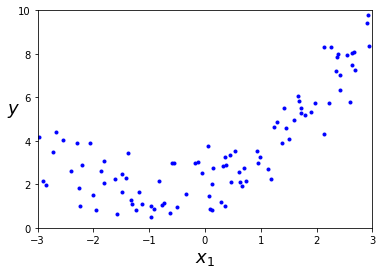

In [64]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Clearly, a straight line will never fit this data properly. So let's use Scikit-Learn's PolynomialFeatures class to transform our training data, adding the square (2^nd-degree polynomial) of each feature in the training set as new features (in this case thre is just one feature):

In [65]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree =2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [66]:
X_poly[0]

array([2.38942838, 5.709368  ])

X_poly now contains the orginal feature of $X$ plus the square of this feature. Now you can fit a LinearRegression model to this extended training data

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

Not bad, but to be expected as we introduced Gaussian noise.

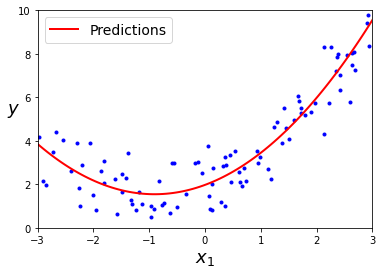

In [68]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features $a$ and $b$, PolynomialFeatures with degree=3 would not only add the features $a^2, a^3, b^2$ and $b^3$ but also the combinations $ab, a^b$ and $ab^2$.

PolynomialFeatures(degree=d) transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d! n!}$ features.

## Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain LinearRegression. For example, the figure applies a $300$-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2^nd-degree polynomial). Notice how the $300$-degree polynomial model wiggles around to get as closed a possible to the training instances.

![](high_degree_polynomial_regression.png)

Of course, this high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic mmodel. It makes sense since the data was generated using a quadratic model, but in general you won't know the function that generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

You can use cross-validation to get an estimate of a model's generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when when a model is too simple or too complex.

Another way is to look at the *learning curves*: these are plots of the model's performance on the training set and the validation set as a function of the traning set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.legend(loc="upper right", fontsize=14)  

Let's look at the learning curves of the plain Linear Regression model (a straight line;)

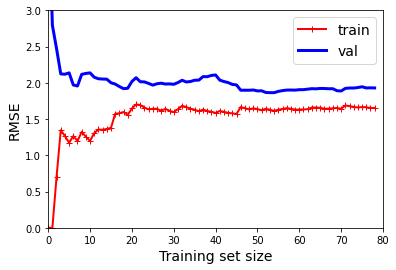

In [70]:
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14)  
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                     
plt.show()   

First, let's look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are addeed to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. Now let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up a plateau, very close to the other curve.

These learning curves are typical of an underfitting  model. Both curves have a reached a plateau; they are close and fairly high.

Now let's look at the learning curves of a 10th-degree polynomial model on the same data

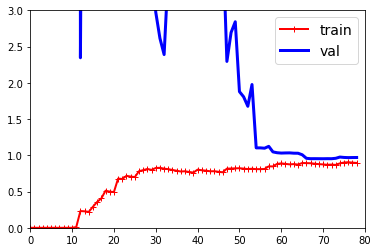

In [71]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

These learning curves look a bit like the previous ones, but there are two very important differences:

- The error on the training data is much lower than with the Linear Regression model.

- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

**Tip** One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.

## The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:

*Bias*

This part of the generalization error is due to wrong assumption, and such as assuming that the data is linear when it is actually quadratic. A high-bias model ist most likely to underfit the training data.
(This notion of bias is not to be confused with the bias term of linear models.)

*Variance*

This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial
model) is likely to have high variance, and thus to overfit the training
data.

*Irreducible error*

This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (that is, to constraint it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will not look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

## Ridge regression

*Ridge regression* is a regularized version of Linear Regression: a *regularization term* equal to $\alpha \sum_{i=1}^{n} \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added tot he cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha = 0$ then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean. 

Ridge Regression cost function:

$$J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2.$$

Note that the bias term $\theta_0$ is not regularized. If we define $w$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $\frac{1}{2}( \lvert \lvert w \rvert \rvert_2)^2$. For Gradient Descent, just add $\alpha w$ to the MSE gradient vector.

It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.


The below figure shows Ridge models trained on some linear data using different $\alpha$ value. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree = 10), then it scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing $\alpha$ leads to flatter (that is less extreme, more reasonable) predictions; this reduces the model's variance but increases its bias.

![](ridge_regression.png)

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same. The below equation shows the closed-form solution (where $A$ is the $(n+1) \times (n+1)$) *identity matrix* except with a $0$ in the top-left cell, corresponding to the bias term).

$$\hat{\theta} = (X^T X + \alpha A)^{-1} X^T y$$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution

In [72]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [73]:
ridge_reg.predict([[1.5]])

array([[5.13357033]])

And using Stochastic Gradient Descent:

In [74]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.12759575])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the $l_2$ norm of the weight vector: this is simply Ridge
Regression.

## Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* (simply called Lasso *Regression*) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularized term to the cost function, but it uses the $l_1$ norm of the weight vector instead of half the square of the $l_2$ norm

$$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \lvert \theta_i \rvert$$

The following figure shows the same thing as the above figure but replaces Ridge models with Lasso models and uses smaller $\alpha$ values.

![](lasso_regression.png)

An important characteristic of Lasso Regression is that it tends to completely eliminate teh weights of the least important features (that is, set them to zero). For example, the dashed line in the right plot (with $\alpha = 10^{-7}$) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other wrods, Lasso Regression automatically performs feature selection and outputs a *sparse model* (that is, with few nonzero feature weights).

You can get a sense of why this is the case by looking at the below figure:

![](lasso_regression_versus_ridge_regularization.png)

on the top-left plot, the background countous (ellipses) represent an unregularized MSE cost function ($\alpha=0$), and the white circle show the Batch Gradient Descent path with that cost function. The foreground countours (diamonds) represent the $l_1$ penalty, and the triangles show the BGD path for this penalty only ($\alpha \rightarrow \infty$). Notice how the path first reaches $\theta_1 = 0$ then rolls down a gutter until it reaches $\theta_2 = 0$. On the top right plot, the contours represent the same cost function plus an $l_1$ penalty with $\alpha = 0.5$. The global minimum is on the $\theta_2 = 0$ axis. BGD first reaches $\theta_2 = 0$, then rolls down the glutter until it reaches the global minimum. The two bottom plots show the same thing but uses an $l_2$ penalty instead. The regularized minimum is closer to $\theta = 0$ than the unregularized minimum, but the weights do not get fully eliminated.

On the Lasso cost function, the BGD path tends to bounce across the gutter toward the end. This is because the slope changes abruptly at $\theta_2 = 0$. You need to gradually reduce the learning rate in order to actually converge to the global minimum.

The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1,2,..,n)$, but Gradient Descent still works fine if you use a *subgradient vector* $g$ instead when any $\theta_i = 0$. The below equation shows a subgradient vector question you can use for Gradient Descent with the Lasso cost function.

Lasso Regression subgradient vector

$$g(\theta, J) = \theta_{\theta} MSE(\theta) + \alpha [\text{sign}(\theta_1) \cdots \text{sign}(\theta_1) ]^T$$

where $$\text{sign}(\theta_i) = \begin{cases} -1 \text{ if } \theta_1 < 0 \\ 0 \ \ \ \text{  if } \theta_i = 0 \\ +1 \text{ if } \theta_i > 0 \end{cases}.$$

Here is a small Scikit-Learn example using the Lasso class. Note that you could instead use an SGDRegressor (penalty = "$l1$").

In [75]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.09481859])

## ELastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio $r$. When $r=0$, Elastic Net is equivalent to Ridge Regression and when $r=1$, it is equivalent to Lasso Regression.

$$J(\theta) = \text{MSE}(\theta) + r \alpha \sum_{i=1}^{n} \lvert \theta_i \rvert + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2.$$

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example using Scikit-Learn’s ElasticNet ($l1$_ratio corresponds to
the mix ratio $r$):

In [76]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.09373477])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. The below figure shows a complex model (in this case a high-degree
Polynomial Regression model) being trained using Batch Gradient Descent. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

![](early_stopping_regularization.png)

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

Here is a basic implementation of early stopping:

In [79]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [80]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Note that with warm_start=True, when the fit() method is called, it just continues training where it left off instead or restarting from scratch.

## Logistic Regression

As we discussed, some regression algorithms  can be used for classification as well (and vice versa). *Logistic Regression* (also called *Logit Regression*) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than $50%$, then the model predicts that the instance belongs to the class (called the positive class, labeled "1"), or else it predicts that it does not (that is, it belongs to the negative class, labeled "0"). This makes it a binary classifier.

## Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input feature (plus a bias term), but instead of outputting the result directly like Linear Regression model does, it outputs the *logistic* of this result


$$\hat{p} = h_{\theta} = \sigma (x^T \theta).$$

The logistic-noted $\sigma(\cdot)$ - is a *sigmoid function* (that is, $S$-shaped) that outputs a number between $0$ and $1$. It is defined as

$$\sigma(t) = \frac{1}{1 + \exp(-t)}.$$

![](logistic_regression.png)

Once the Logistic Regression model has estimated the $\hat{p} = h_{\theta} (x)$ that an instance $x$ belongs to the positive class, it can make its prediction $\hat{y}$ easily

$$\hat{y} = \begin{cases}  0 \text{ if } \hat{p} < 0.5 \\ 1 \text{ if } \hat{p} \geq 0.5. \end{cases}$$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \geq 0.5$ when $t \geq 0 $, so a Logistic Regression model predicts $1$ if $x^T \theta$ is positive, and $0$ if it is negative.

The score $t$ is often called the *logit*: this name comes from the fact that the logit function, defined as $\text{logit}(p) = \log(p/(1-p))$, is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability $p$, you will find the result is $t$. The logit is also called *log-odds*, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

 **Training and Cost Function**
 
Now you know a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector $\theta$ so that model estimates high probabilities for positive instances ($y=1$ ) and low probabilites for negative instances $y=0$. This idea is captured by the cost function shown belown for a single training instance $x$


$$c(\theta) = \begin{cases}  -\log( \hat{p}) \text{ if } y = 1 \\ -\log(1- \hat{p}) \text{ if } y=0. \end{cases}$$


This cost function makes sense becauase $-\log(t)$ grows very large when $t$ approaches $0$, so the cost will be large if the model estimates a probability close to $0$ for a positive instance, and it will also be large very large if the model estimates a probability close to $1$ for a negative instance. On the other hand, $-\log(t)$ is close to $0$ when $t$ is closed to $1$, so the cost will be close to $1$ for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression, called the *log loss*, show in equation below

$$J(\theta) = \frac{-1}{m} \sum_{i=1}{m} [y^{(i)} \log(\hat{p}^{(i)})+ (1-y^{(i)})\log(1 - \hat{p}^{(i)})].$$

The bad news is that there is no closed-form equation to compute the value of $\theta$ that minimizes this cost function (there is no equivalent of the Normal Equation). But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning
rate is not too large and you wait long enough). The partial derivatives of the cost function with regards to the $j$th model parameter $\theta_j$ is given by

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\sigma (\theta^T x^{(i)}) - y^{(i)})x_j^{(i)}$$

Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient algorithm. That’s
it: you now know how to train a Logistic Regression model. For Stochastic GD you would of course just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

## Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

Let's try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First let's load the data:

In [82]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [83]:
X=iris['data'][:,3:] #petal width

In [84]:
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Now let's train a Logistic Regression model:

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Let's look ath model's estimated probabilities for flowers with petal widths varying from $0$ to $3$ cm

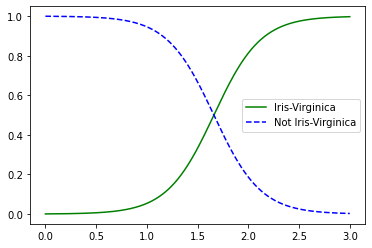

In [90]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label= "Iris-Virginica")
plt.plot(X_new, y_proba[:,0],"b--", label= "Not Iris-Virginica")
plt.legend()
plt.show()

Better figure:

![](estimated_probabilities_decision_boundary.png)

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap.
Above about 2 cm the classifier is highly confident that the flower is an Iris- Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):

In [91]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

The following figure

![image.png](linear_decision_boundary.png)

shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. The dashed line represents the points where the model estimates a $50$% probability: this is the model's decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability.

Just like the other linear models, Logistic Regression models can be regularized using $l_1$ or $l_2$ penalties. Scikit-Learn actually adds an $l_2$ penalty by default.

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: $C$. The higher the value of $C$, the *less* the model is regularized.

## Softmax regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine mulitple binary classifiers. This is called *Softmax Regression* or *Multinomial Logistic Regression.*

The idea is quite simple: when given an instance $x$, the Softmax Regression model first computes a score $s_k(x)$ for each class $k$, then estimates the probability of each class by applying the *softmax function* (also called the *normalized exponential*) to the scores. The equation to compute $s_k(x)$ should look familiar, as it is just like  the equation for Linear Regression prediction

$$s_k(x) = x^T \theta^{(k)} \text{ (Softmax score for class $k$)}$$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a *parameter matrix* $\Theta$.

Once you computed the score of every class for the instance $x$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function: 

$$\hat{p}_k = \sigma(s(x))_k  = \frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))}$$

- $K$ is the number of classes.

- $s(x)$ is a vector containing the scores of each class for the instance $x$.

- $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.


Just like the Logistic Regression classifier, the Softmax Regresison classifier predicts the class with the highest probability (which is imply the class with the highest score), as show in the below equation

$$\hat{y} = \text{argmax}_k \sigma(s(x))_k = \text{argmax}_k s_k(x) = \text{argmax}_k ((\theta^{(k)})^Tx) $$

- The *argmax* operator retuns the value of a variable that maximizes a function.

**Note:** The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let's look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function show below, called the *cross entropy*, should lead to this objective because penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimted class probabilites match the target classes (we will use it again several times in the following chapters).

$$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log (\hat{p}_{k}^{(i)})$$

- $y_k^{(i)}$ is the target probability that the $i$th instance belongs to class $k$. In general, it is either equal to $1$ or $0$, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes ($K=2$), this cost function is equivalent to the Logistic Regression's cost function.

The gradient vector of this cost function with regards to $\theta^{(k)}$ is given by the equation below

$$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the paramter matrix $\Theta$ that minimizes the cost function.

Let's use Softmax Regression to classify iris flowers into all three classes. Scikit-Learn's LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver. It also applies $l_2$ regularization by default, which you can control using the hyperparameter $C$. 

In [93]:
X = iris['data'][:,(2,3)] # petal length, petal width
y = iris['target']

In [94]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver ="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [95]:
softmax_reg.predict([[5,2]])

array([2])

In [96]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

The following figure shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear. The figure also shows the probabilities for the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). Notice that the model can predict a class that has estimated probability below $50$%. For example, at the point where all decision boundaries meet, all classses have an equal estimated probability of 33%.

![](softmax_regression_decision_boundaries.png)